In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!pip install apyori
from apyori import apriori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=fbea0b740852880fcbcd3a843aeef7f68543c31d6f2a8da2c0429a2ff76b2acb
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/Groceries_dataset.csv')

In [7]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [9]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [10]:
df.shape

(38765, 3)

In [11]:
df.size

116295

In [12]:
df.ndim

2

In [13]:
## q1- which of the items are the top selling item??
df.itemDescription.value_counts().head(10)

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

Text(0.5, 1.0, 'Top 10 selling products')

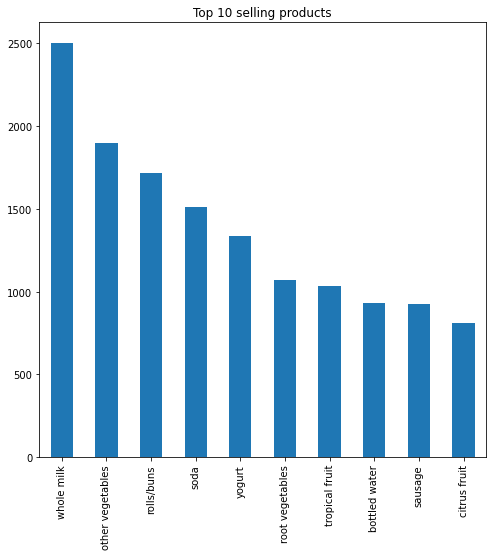

In [14]:
plt.figure(figsize=(8,8))
df.itemDescription.value_counts().head(10).plot.bar()
plt.title('Top 10 selling products')

In [15]:
## Q2- Which of the items are 10 least selling items?
df.itemDescription.value_counts().tail(10).sort_values()

kitchen utensil          1
preservation products    1
baby cosmetics           3
bags                     4
make up remover          5
frozen chicken           5
rubbing alcohol          5
toilet cleaner           5
salad dressing           6
whisky                   8
Name: itemDescription, dtype: int64

Text(0.5, 1.0, 'Top 10 Selling items')

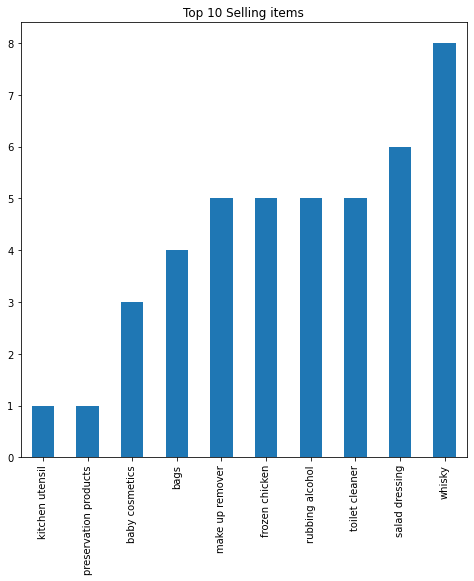

In [16]:
plt.figure(figsize=(8,8))
df.itemDescription.value_counts().tail(10).sort_values().plot.bar()
plt.title('Top 10 Selling items')

In [17]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [18]:
# Q3 top 10 customers
df.Member_number.value_counts().head(10)

3180    36
3050    33
2051    33
3737    33
2433    31
3915    31
2625    31
2271    31
3872    30
2394    29
Name: Member_number, dtype: int64

Text(0.5, 1.0, 'top 10 customers')

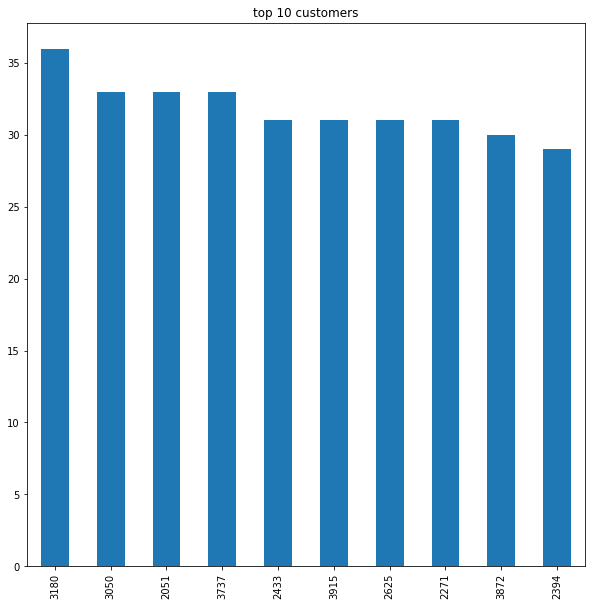

In [19]:
plt.figure(figsize=(10,10))
df.Member_number.value_counts().head(10).plot.bar()
plt.title('top 10 customers')

In [20]:
df.head(2)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk


In [21]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day

In [22]:
df.head()

,Member_number,Date,itemDescription,year,month,day
0,1808,21-07-2015,tropical fruit,2015,7,21
1,2552,05-01-2015,whole milk,2015,5,1
2,2300,19-09-2015,pip fruit,2015,9,19
3,1187,12-12-2015,other vegetables,2015,12,12
4,3037,01-02-2015,whole milk,2015,1,2


In [23]:
# Q4- in which year majority of transactions has happened??
df.year.value_counts()

2015    20488
2014    18277
Name: year, dtype: int64

In [24]:
df.month.value_counts()

8     3498
5     3335
1     3333
6     3316
3     3283
11    3273
7     3268
10    3218
4     3172
12    3074
2     3032
9     2963
Name: month, dtype: int64

In [25]:
df.day.value_counts()

28    1375
21    1354
26    1351
8     1349
13    1341
14    1341
27    1327
10    1308
4     1308
11    1297
24    1290
5     1290
18    1285
23    1277
7     1277
19    1272
22    1272
9     1271
2     1252
1     1250
15    1245
3     1243
6     1232
25    1229
20    1214
30    1201
17    1181
12    1179
16    1158
29    1124
31     672
Name: day, dtype: int64

In [26]:
## in the year 2015- how many tractions was there in each month
df[df.year == 2015]['month'].value_counts().sort_index()

1     1829
2     1485
3     1792
4     1666
5     1710
6     1791
7     1645
8     1963
9     1613
10    1663
11    1777
12    1554
Name: month, dtype: int64

# Aprori Implementation

In [27]:
df.head()

,Member_number,Date,itemDescription,year,month,day
0,1808,21-07-2015,tropical fruit,2015,7,21
1,2552,05-01-2015,whole milk,2015,5,1
2,2300,19-09-2015,pip fruit,2015,9,19
3,1187,12-12-2015,other vegetables,2015,12,12
4,3037,01-02-2015,whole milk,2015,1,2


In [28]:
data = df.copy()

In [29]:
data = pd.get_dummies(data['itemDescription'])

In [30]:
data.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,...,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [31]:
data1 = df.copy()

In [32]:
data1.drop(['itemDescription'],axis=1,inplace=True)

In [33]:
data1 = data1.join(data)

In [34]:
data1

,Member_number,Date,year,month,day,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,...,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,21-07-2015,2015,7,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2552,05-01-2015,2015,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2300,19-09-2015,2015,9,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1187,12-12-2015,2015,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3037,01-02-2015,2015,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38760,4471,08-10-2014,2014,8,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38761,2022,23-02-2014,2014,2,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38762,1097,16-04-2014,2014,4,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38763,1510,03-12-2014,2014,3,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
products = df['itemDescription'].unique()

In [36]:
products

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [37]:
data2 = data1.groupby(['Member_number','Date'])[products[:]].sum()

In [38]:
data2.head()

tropical fruit  ...  preservation products
Member_number Date                        ...                       
1000          15-03-2015               0  ...                      0
              24-06-2014               0  ...                      0
              24-07-2015               0  ...                      0
              25-11-2015               0  ...                      0
              27-05-2015               0  ...                      0

[5 rows x 167 columns]

In [39]:
data2 = data2.reset_index()[products]

In [40]:
data2

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,butter,fruit/vegetable juice,packaged fruit/vegetables,chocolate,specialty bar,butter milk,bottled water,yogurt,sausage,brown bread,hamburger meat,root vegetables,pork,pastry,canned beer,berries,coffee,misc. beverages,ham,turkey,curd cheese,red/blush wine,frozen potato products,flour,sugar,frozen meals,herbs,soda,detergent,grapes,...,soft cheese,mayonnaise,dental care,roll products,kitchen towels,flower soil/fertilizer,cereals,meat spreads,dishes,male cosmetics,candles,whisky,tidbits,cooking chocolate,seasonal products,liqueur,abrasive cleaner,syrup,ketchup,cream,skin care,rubbing alcohol,nut snack,cocoa drinks,softener,organic products,cake bar,honey,jam,kitchen utensil,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14959,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
data2.values

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [42]:
data2['tropical fruit']

0        0
1        0
2        0
3        0
4        0
        ..
14958    1
14959    0
14960    0
14961    0
14962    0
Name: tropical fruit, Length: 14963, dtype: uint8

In [43]:
def funct(data):
    for i in products:
        if data[i]>0:
            data[i]=i
    return data

In [44]:
data2 = data2.apply(funct,axis=1)

In [45]:
data2.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,butter,fruit/vegetable juice,packaged fruit/vegetables,chocolate,specialty bar,butter milk,bottled water,yogurt,sausage,brown bread,hamburger meat,root vegetables,pork,pastry,canned beer,berries,coffee,misc. beverages,ham,turkey,curd cheese,red/blush wine,frozen potato products,flour,sugar,frozen meals,herbs,soda,detergent,grapes,...,soft cheese,mayonnaise,dental care,roll products,kitchen towels,flower soil/fertilizer,cereals,meat spreads,dishes,male cosmetics,candles,whisky,tidbits,cooking chocolate,seasonal products,liqueur,abrasive cleaner,syrup,ketchup,cream,skin care,rubbing alcohol,nut snack,cocoa drinks,softener,organic products,cake bar,honey,jam,kitchen utensil,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,whole milk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,yogurt,sausage,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,whole milk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,pastry,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,canned beer,0,0,misc. beverages,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,sausage,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,soda,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
newdata = data2.values

In [47]:
newdata

array([[0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [48]:
newdata.ndim

2

In [49]:
newdata = [i[i!=0].tolist() for i in newdata if i[i!=0].tolist()]

In [50]:
newdata

[['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['other vegetables', 'frozen vegetables'],
 ['whole milk', 'butter'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['rolls/buns', 'sausage'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['tropical fruit', 'whole milk', 'pip fruit'],
 ['rolls/buns', 'chocolate', 'red/blush wine'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'rolls/buns', 'packaged fruit/vegetables', 'chocolate'],
 ['whole milk', 'root vegetables', 'pastry'],
 

In [51]:
association = apriori(newdata,min_support = 0.0003,min_confidence = 0.05,max_length=3,min_lift =3)

In [52]:
result = list(association)

In [53]:
result

[RelationRecord(items=frozenset({'fruit/vegetable juice', 'liver loaf'}), support=0.00040098910646260775, ordered_statistics=[OrderedStatistic(items_base=frozenset({'liver loaf'}), items_add=frozenset({'fruit/vegetable juice'}), confidence=0.12, lift=3.5276227897838903)]),
 RelationRecord(items=frozenset({'pickled vegetables', 'ham'}), support=0.0005346521419501437, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pickled vegetables'}), items_add=frozenset({'ham'}), confidence=0.05970149253731344, lift=3.4895055970149254)]),
 RelationRecord(items=frozenset({'meat', 'roll products '}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'roll products '}), items_add=frozenset({'meat'}), confidence=0.06097560975609757, lift=3.620547812620984)]),
 RelationRecord(items=frozenset({'misc. beverages', 'salt'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'salt'}), items_add=frozenset({'misc. beverag

In [54]:
type(result[1])

apyori.RelationRecord

In [55]:
result[1]

RelationRecord(items=frozenset({'pickled vegetables', 'ham'}), support=0.0005346521419501437, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pickled vegetables'}), items_add=frozenset({'ham'}), confidence=0.05970149253731344, lift=3.4895055970149254)])